# Semantic Clothes Segmentation 

**Introduction**

Semantic Segmentation is one of major tasks in computer vision. Its a pixel-wise classification of an image into object classes.

**Dataset**

* Contains 1000 images and segmenation 
masks pairs of individual people's clothing.
* 59 object classes
* no preprocessing
* all images are of same size, same * format, and ready to model.
* Size: 825pixels by 550 pixels
* Format: PNG, PNG is lossless with the essence of Originality.
* the dataset is in two folders:-
1. png_images
2. png_masks

[Data Link](https://www.kaggle.com/datasets/rajkumarl/people-clothing-segmentation)

In [28]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

In [29]:
#a list to collect paths of 1000 images
image_path = []
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/Fashion/png_images'):
  #iterate over 1000 images
  for file in files:
    #create path
    path = os. path.join(root, file)
    #add path to list
    image_path.append(path)
len(image_path)

1000

In [31]:
# a list to collect paths of 1000 masks
mask_path = []
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/Fashion/png_masks'):
    #iterate over 1000 masks
    for file in files:
        # obtain the path
        path = os.path.join(root,file)
        # add path to the list
        mask_path.append(path)
len(mask_path)

1000

In [32]:
print(image_path[:5])

['/content/drive/MyDrive/Colab Notebooks/Fashion/png_images/IMAGES/img_0013.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_images/IMAGES/img_0011.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_images/IMAGES/img_0004.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_images/IMAGES/img_0010.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_images/IMAGES/img_0007.png']


In [33]:
print(mask_path[:5])

['/content/drive/MyDrive/Colab Notebooks/Fashion/png_masks/MASKS/seg_0428.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_masks/MASKS/seg_0122.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_masks/MASKS/seg_0195.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_masks/MASKS/seg_0093.png', '/content/drive/MyDrive/Colab Notebooks/Fashion/png_masks/MASKS/seg_0596.png']


Images are unsorted in the dataset by default. We must sort them by their file names to obtain the right image_mask pairs

In [34]:
image_path.sort()
mask_path.sort()

Read and decode the images and masks; store them in separate lists

In [35]:
# create a list to store images
images = []
# iterate over 1000 image paths
for path in tqdm(image_path):
    # read file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    image = tf.image.decode_png(file, channels=3, dtype=tf.uint8)
    # append to the list
    images.append(image)

# create a list to store masks
masks = []
# iterate over 1000 mask paths
for path in tqdm(mask_path):
    # read the file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    mask = tf.image.decode_png(file, channels=1, dtype=tf.uint8)
    # append mask to the list
    masks.append(mask)

100%|██████████| 1000/1000 [02:58<00:00,  5.60it/s]


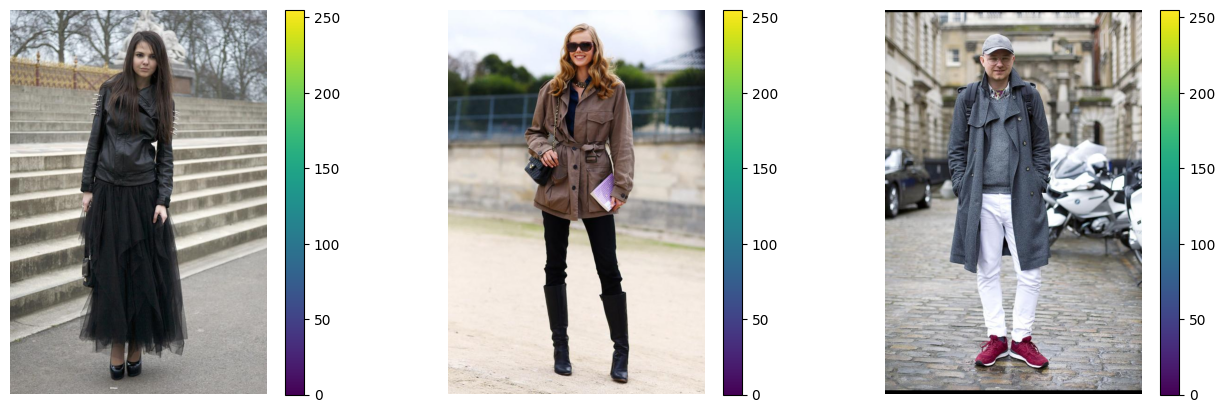

In [36]:
plt.figure(figsize=(16,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = images[i]
    plt.imshow(img)
    plt.colorbar()
    plt.axis('off')
plt.show()

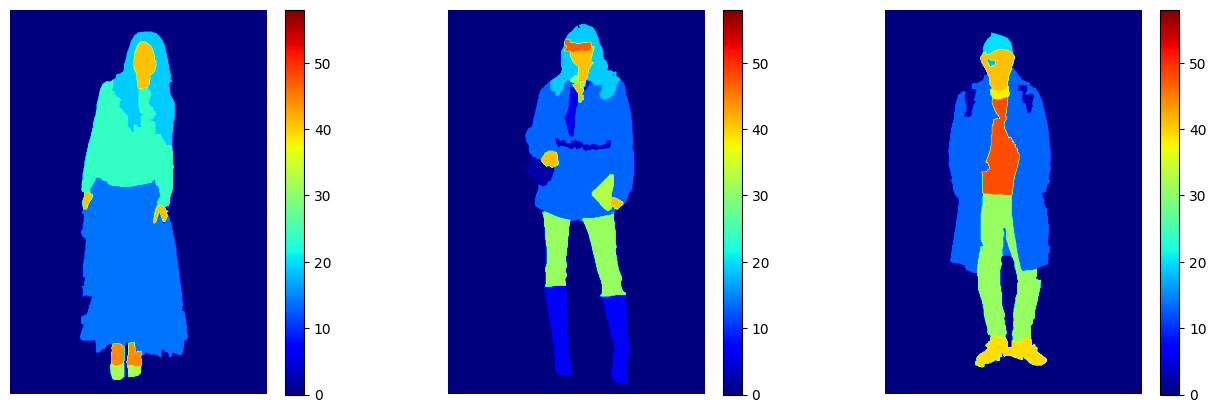

In [37]:
# Define a normalizer that can be applied while visualizing masks to have a consistency
# min class value is 0
# max class value is 58
NORM = mpl.colors.Normalize(vmin=0, vmax=58)

# plot masks
plt.figure(figsize=(16,5))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = masks[i]
    plt.imshow(img, cmap='jet', norm=NORM)
    plt.colorbar()
    plt.axis('off')
plt.show()